Name:Gottapu Leela satya swarup sai \
Id:1240580 \
References :\
1) https://medium.datadriveninvestor.com/load-in-image-classification-data-e2dfec6dfcb6 \

2) https://www.youtube.com/watch?v=dw96S_iFFbI&ab_channel=DiazonicLabs \
3) https://youtu.be/dekEzUib7tA

#NYC_NEURAL

In [125]:
!pip install -q kaggle

In [126]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"satyaswarup3","key":"e59999ac6bb7d9f2b0d393fefd4d2e7e"}'}

In [127]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [128]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [129]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
replace GCP-Coupons-Instructions.rtf? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [130]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split


In [131]:
train = pd.read_csv("/content/train.csv", nrows = 1000000)
test = pd.read_csv("/content/test.csv")
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [132]:
print("Shape of the Training data :", train.shape)
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


There are null values in both dropoff_longitude and dropoff_latitude

In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


We can see no null values in test set.

##Data cleaning

In [135]:
train=train.dropna(subset=["dropoff_longitude"])
train=train.dropna(subset=["dropoff_latitude"])

We dropped the Nan corresponding values from the dataset,as there are less null values it is better to drop.

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                999990 non-null  object 
 1   fare_amount        999990 non-null  float64
 2   pickup_datetime    999990 non-null  object 
 3   pickup_longitude   999990 non-null  float64
 4   pickup_latitude    999990 non-null  float64
 5   dropoff_longitude  999990 non-null  float64
 6   dropoff_latitude   999990 non-null  float64
 7   passenger_count    999990 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [137]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [138]:
#positive fare_amount,positive passenger_count
train.drop(train[train.fare_amount < 0].index, inplace=True)
train = train[train['passenger_count'] >0]

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996397 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                996397 non-null  object 
 1   fare_amount        996397 non-null  float64
 2   pickup_datetime    996397 non-null  object 
 3   pickup_longitude   996397 non-null  float64
 4   pickup_latitude    996397 non-null  float64
 5   dropoff_longitude  996397 non-null  float64
 6   dropoff_latitude   996397 non-null  float64
 7   passenger_count    996397 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.4+ MB


In [140]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996397.000000,996397.000000,996397.000000,996397.000000,996397.000000,996397.000000
mean,11.357829,-72.525848,39.928485,-72.527388,39.919569,1.690954
std,9.831130,12.066290,7.633486,11.329665,8.209810,1.322430
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,1.000000
25%,6.000000,-73.992060,40.734960,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967091,40.767152,-73.963648,40.768128,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [141]:
train=train.drop("key",axis=1)

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996397 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        996397 non-null  float64
 1   pickup_datetime    996397 non-null  object 
 2   pickup_longitude   996397 non-null  float64
 3   pickup_latitude    996397 non-null  float64
 4   dropoff_longitude  996397 non-null  float64
 5   dropoff_latitude   996397 non-null  float64
 6   passenger_count    996397 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.8+ MB


In [143]:
train = train[(train['pickup_longitude']<180) & (-180<train['pickup_longitude'])]
train = train[(-90<train['pickup_latitude']) & (train['pickup_latitude']<90)]

As there is a range for latitudes and longitudes,dropping the values which are out of the range.

##Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Fare')

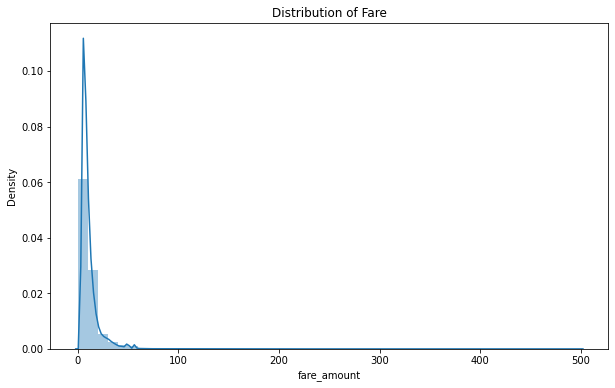

In [144]:
plt.figure(figsize = (10, 6))
sns.distplot(train['fare_amount']);
plt.title('Distribution of Fare')

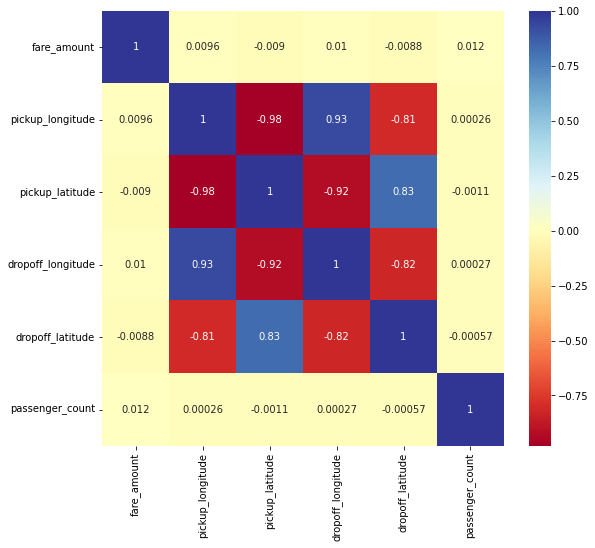

In [145]:
plt.figure(figsize=(9,8))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.RdYlBu)
plt.show()

Here we can observe correlations of fare amount with all and correlations among the features.Our focus is more on the features which have more correlation with fare amount.

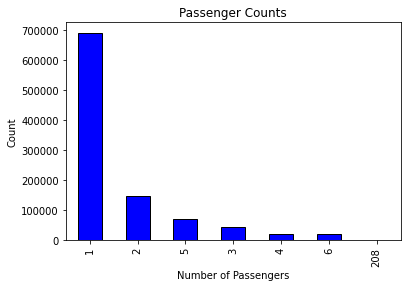

In [146]:
train['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); plt.xlabel('Number of Passengers'); plt.ylabel('Count');

Based on the graph we can remove any passengers greater than 6,as there are not much of them

In [147]:
#removing outliers

train = train[train['fare_amount'].between(left = 2.5, right = 100)]
train = train.loc[train['passenger_count'] < 6]
train = train.loc[train['pickup_latitude'].between(40, 42)]
train = train.loc[train['pickup_longitude'].between(-75, -72)]
train = train.loc[train['dropoff_latitude'].between(40, 42)]
train = train.loc[train['dropoff_longitude'].between(-75, -72)]


From the new york city map coordinates we can narrow down the latitudes and longitudes.If we need more accuracy we can just drop the latitudes less than 2 percentile and greater than 98 percentile,it just makes the data less.
From observing the fare amount distribution above we can narrow down the fare amount to a range.

In [148]:
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [149]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [150]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [151]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [152]:
train=train.drop("pickup_datetime",axis=1)

##Data scaling

In [153]:
#data scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_s=ss.fit_transform(train)
train=pd.DataFrame(train_s,
                   columns=train.columns)

In [154]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,-0.724695,3.359419,-0.991519,3.500694,-1.183006,-0.517876,-1.453580,-0.078498,-0.079798,-1.558554,0.535752,-0.611104
1,0.602106,-1.049257,-1.325377,-0.132049,0.926445,-0.517876,-0.917780,-1.533147,-1.231688,-1.045676,0.382252,1.366997
2,-0.596295,-0.194153,0.340144,-0.448039,-0.024784,0.348916,-0.381979,0.503361,0.265769,-0.019919,-2.073740,-0.515454
3,-0.382295,-0.306901,-0.597397,-0.456615,0.203025,-0.517876,0.153821,-0.660358,0.611335,1.005838,-1.459742,-0.139597
4,-0.639095,0.181749,0.564738,0.464699,0.979631,-0.517876,-0.917780,-0.951287,-0.770932,-1.045676,-0.999243,-0.352918


In [155]:
len(train.columns)

12

In [156]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [157]:
# create X and y values (features and labels)
X = train.drop("fare_amount",axis=1)
y = train['fare_amount']

In [158]:
# creating train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(954558, 763646, 190912)

In [159]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

##A)Baseline neural network

In [160]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
model1 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(16, activation='sigmoid'),
                                       tf.keras.layers.Dense(8, activation='sigmoid'),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss = tf.keras.losses.mae,
                        optimizer = "sgd",
                        metrics = ["mae","mse","mape"]
                        )

# 3. Fitting the model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 20)

Epoch 1/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.3751 - mae: 0.3751 - mse: 0.5796 - mape: 185.8210 - val_loss: 0.2636 - val_mae: 0.2636 - val_mse: 0.3056 - val_mape: 175.2336
Epoch 2/20
5966/5966 [==============================] - 12s 2ms/step - loss: 0.2510 - mae: 0.2510 - mse: 0.2661 - mape: 168.5961 - val_loss: 0.2436 - val_mae: 0.2436 - val_mse: 0.2474 - val_mape: 170.9093
Epoch 3/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.2371 - mae: 0.2371 - mse: 0.2323 - mape: 165.0149 - val_loss: 0.2332 - val_mae: 0.2332 - val_mse: 0.2283 - val_mape: 167.1478
Epoch 4/20
5966/5966 [==============================] - 12s 2ms/step - loss: 0.2300 - mae: 0.2300 - mse: 0.2227 - mape: 162.4887 - val_loss: 0.2281 - val_mae: 0.2281 - val_mse: 0.2225 - val_mape: 164.2431
Epoch 5/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.2263 - mae: 0.2263 - mse: 0.2200 - mape: 160.7695 - val_loss: 0.2256 - val_mae: 0.2256 - val_mse: 0.2

In [161]:
model1.evaluate(X_test,y_test)

5966/5966 [==============================] - 12s 2ms/step - loss: 0.2080 - mae: 0.2080 - mse: 0.2010 - mape: 150.1001


[0.20803123712539673,
 0.20803123712539673,
 0.20103944838047028,
 150.1001434326172]

In [197]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model1.predict(X_test)
mod1=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

##B)Increasing layers and neurons

In [162]:
##adding two more layers


model2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(16, activation='sigmoid'),
                                       tf.keras.layers.Dense(16, activation='sigmoid'),
                                       tf.keras.layers.Dense(16, activation='sigmoid'),
                                       tf.keras.layers.Dense(8, activation='sigmoid'),
                                       tf.keras.layers.Dense(1)
])


model2.compile(loss = tf.keras.losses.mae,
                        optimizer = "sgd",
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 20)

Epoch 1/20
5966/5966 [==============================] - 14s 2ms/step - loss: 0.5688 - mae: 0.5688 - mse: 1.0866 - mape: 233.4034 - val_loss: 0.5699 - val_mae: 0.5699 - val_mse: 1.1011 - val_mape: 236.2405
Epoch 2/20
5966/5966 [==============================] - 12s 2ms/step - loss: 0.5669 - mae: 0.5669 - mse: 1.0814 - mape: 233.5749 - val_loss: 0.5670 - val_mae: 0.5670 - val_mse: 1.0979 - val_mape: 241.1608
Epoch 3/20
5966/5966 [==============================] - 12s 2ms/step - loss: 0.5591 - mae: 0.5591 - mse: 1.0573 - mape: 230.9350 - val_loss: 0.5476 - val_mae: 0.5476 - val_mse: 1.0296 - val_mape: 225.5945
Epoch 4/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.4091 - mae: 0.4091 - mse: 0.6715 - mape: 186.3604 - val_loss: 0.2694 - val_mae: 0.2694 - val_mse: 0.3236 - val_mape: 179.4146
Epoch 5/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.2549 - mae: 0.2549 - mse: 0.2716 - mape: 173.1137 - val_loss: 0.2476 - val_mae: 0.2476 - val_mse: 0.2

In [163]:
model2.evaluate(X_test,y_test)

5966/5966 [==============================] - 13s 2ms/step - loss: 0.2045 - mae: 0.2045 - mse: 0.1965 - mape: 147.2171


[0.20452575385570526,
 0.20452575385570526,
 0.19649255275726318,
 147.21705627441406]

We can see all mae,mse,mape slightly decreased by increasing number of layers

In [199]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model2.predict(X_test)
mod2=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [164]:
##Increasing neurons in a pyramid fashion

model3 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(50, activation='sigmoid'),
                                       tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(16, activation='sigmoid'),
                                       tf.keras.layers.Dense(8, activation='sigmoid'),
                                       tf.keras.layers.Dense(1)
])


model3.compile(loss = tf.keras.losses.mae,
                        optimizer = "sgd",
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 20)


Epoch 1/20
5966/5966 [==============================] - 15s 2ms/step - loss: 0.5669 - mae: 0.5669 - mse: 1.0785 - mape: 233.1423 - val_loss: 0.5650 - val_mae: 0.5650 - val_mse: 1.0837 - val_mape: 236.7046
Epoch 2/20
5966/5966 [==============================] - 14s 2ms/step - loss: 0.5446 - mae: 0.5446 - mse: 1.0048 - mape: 227.2030 - val_loss: 0.4847 - val_mae: 0.4847 - val_mse: 0.8290 - val_mape: 210.3310
Epoch 3/20
5966/5966 [==============================] - 14s 2ms/step - loss: 0.2944 - mae: 0.2944 - mse: 0.3587 - mape: 170.8060 - val_loss: 0.2448 - val_mae: 0.2448 - val_mse: 0.2447 - val_mape: 171.0743
Epoch 4/20
5966/5966 [==============================] - 15s 2ms/step - loss: 0.2400 - mae: 0.2400 - mse: 0.2339 - mape: 166.7419 - val_loss: 0.2375 - val_mae: 0.2375 - val_mse: 0.2318 - val_mape: 167.4745
Epoch 5/20
5966/5966 [==============================] - 14s 2ms/step - loss: 0.2351 - mae: 0.2351 - mse: 0.2289 - mape: 164.4201 - val_loss: 0.2335 - val_mae: 0.2335 - val_mse: 0.2

In [165]:
model3.evaluate(X_test,y_test)

5966/5966 [==============================] - 13s 2ms/step - loss: 0.2100 - mae: 0.2100 - mse: 0.2046 - mape: 154.7534


[0.2099819928407669,
 0.2099819928407669,
 0.2045537233352661,
 154.75335693359375]

Here we can see both mae,mse slightly decreased by increasing neurons per layer but mape increased a little bit

In [200]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model3.predict(X_test)
mod3=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

##C)Experimenting with activation functions

In [166]:
#Taking relu for all layers cause it performs better than sigmoid

model4 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(50, activation='relu'),
                                       tf.keras.layers.Dense(32, activation='relu'),
                                       tf.keras.layers.Dense(16, activation='relu'),
                                       tf.keras.layers.Dense(8, activation='relu'),
                                       tf.keras.layers.Dense(1)
])


model4.compile(loss = tf.keras.losses.mae,
                        optimizer = "sgd",
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model4.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 20)

Epoch 1/20
5966/5966 [==============================] - 15s 2ms/step - loss: 0.2410 - mae: 0.2410 - mse: 0.2844 - mape: 161.9948 - val_loss: 0.2143 - val_mae: 0.2143 - val_mse: 0.2371 - val_mape: 153.9532
Epoch 2/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.2058 - mae: 0.2058 - mse: 0.2148 - mape: 142.4328 - val_loss: 0.2005 - val_mae: 0.2005 - val_mse: 0.2053 - val_mape: 143.4268
Epoch 3/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.1981 - mae: 0.1981 - mse: 0.1957 - mape: 136.5377 - val_loss: 0.1963 - val_mae: 0.1963 - val_mse: 0.1945 - val_mape: 138.8696
Epoch 4/20
5966/5966 [==============================] - 14s 2ms/step - loss: 0.1954 - mae: 0.1954 - mse: 0.1916 - mape: 134.2178 - val_loss: 0.1949 - val_mae: 0.1949 - val_mse: 0.1911 - val_mape: 137.3786
Epoch 5/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.1934 - mae: 0.1934 - mse: 0.1892 - mape: 132.8936 - val_loss: 0.1935 - val_mae: 0.1935 - val_mse: 0.1

In [167]:
model4.evaluate(X_test,y_test)

5966/5966 [==============================] - 12s 2ms/step - loss: 0.1785 - mae: 0.1785 - mse: 0.1759 - mape: 127.3868


[0.17848441004753113,
 0.17848441004753113,
 0.1759074479341507,
 127.38678741455078]

We can observe changing activation function very much decreased all our error metrics

In [201]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model4.predict(X_test)
mod4=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [168]:
#Taking leaky_relu and checking perfomance metrics

#To use the leaky ReLU activation function, you must create a LeakyReLU instance

import keras
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)

model5 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(50, activation=leaky_relu),
                                       tf.keras.layers.Dense(32, activation=leaky_relu),
                                       tf.keras.layers.Dense(16, activation=leaky_relu),
                                       tf.keras.layers.Dense(8, activation=leaky_relu),
                                       tf.keras.layers.Dense(1)
])


model5.compile(loss = tf.keras.losses.mae,
                        optimizer = "sgd",
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model5.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 20)

Epoch 1/20
5966/5966 [==============================] - 15s 2ms/step - loss: 0.2294 - mae: 0.2294 - mse: 0.2898 - mape: 158.4252 - val_loss: 0.2140 - val_mae: 0.2140 - val_mse: 0.2634 - val_mape: 155.7536
Epoch 2/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.2073 - mae: 0.2073 - mse: 0.2447 - mape: 145.0127 - val_loss: 0.2037 - val_mae: 0.2037 - val_mse: 0.2369 - val_mape: 145.7414
Epoch 3/20
5966/5966 [==============================] - 14s 2ms/step - loss: 0.2010 - mae: 0.2010 - mse: 0.2287 - mape: 139.8694 - val_loss: 0.2006 - val_mae: 0.2006 - val_mse: 0.2256 - val_mape: 143.3586
Epoch 4/20
5966/5966 [==============================] - 14s 2ms/step - loss: 0.1977 - mae: 0.1977 - mse: 0.2187 - mape: 136.9541 - val_loss: 0.1972 - val_mae: 0.1972 - val_mse: 0.2124 - val_mape: 138.3837
Epoch 5/20
5966/5966 [==============================] - 13s 2ms/step - loss: 0.1952 - mae: 0.1952 - mse: 0.2102 - mape: 134.8869 - val_loss: 0.1956 - val_mae: 0.1956 - val_mse: 0.2

In [169]:
model5.evaluate(X_test,y_test)

5966/5966 [==============================] - 13s 2ms/step - loss: 0.1776 - mae: 0.1776 - mse: 0.1775 - mape: 126.3585


[0.17763429880142212,
 0.17763429880142212,
 0.17751337587833405,
 126.35848999023438]

With leaky relu the losses are almost same as from relu activation function

In [202]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model5.predict(X_test)
mod5=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [170]:
#Doing batch normalization for scaling and adding softmax activation function at the end to get positive output values at the end

model6 = tf.keras.Sequential([
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(50, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(32, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(16, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(8, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(1,activation ='softmax')
])


model6.compile(loss = tf.keras.losses.mae,
                        optimizer = "sgd",
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model6.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 20)


Epoch 1/20
5966/5966 [==============================] - 21s 3ms/step - loss: 1.2887 - mae: 1.2887 - mse: 1.9973 - mape: 801.9169 - val_loss: 1.2930 - val_mae: 1.2930 - val_mse: 2.0110 - val_mape: 813.7867
Epoch 2/20
5966/5966 [==============================] - 19s 3ms/step - loss: 1.2887 - mae: 1.2887 - mse: 1.9973 - mape: 801.9155 - val_loss: 1.2930 - val_mae: 1.2930 - val_mse: 2.0110 - val_mape: 813.7867
Epoch 3/20
5966/5966 [==============================] - 19s 3ms/step - loss: 1.2887 - mae: 1.2887 - mse: 1.9973 - mape: 801.9171 - val_loss: 1.2930 - val_mae: 1.2930 - val_mse: 2.0110 - val_mape: 813.7867
Epoch 4/20
5966/5966 [==============================] - 19s 3ms/step - loss: 1.2887 - mae: 1.2887 - mse: 1.9973 - mape: 801.9166 - val_loss: 1.2930 - val_mae: 1.2930 - val_mse: 2.0110 - val_mape: 813.7867
Epoch 5/20
5966/5966 [==============================] - 19s 3ms/step - loss: 1.2887 - mae: 1.2887 - mse: 1.9973 - mape: 801.9155 - val_loss: 1.2930 - val_mae: 1.2930 - val_mse: 2.0

In [171]:
model6.evaluate(X_test,y_test)

5966/5966 [==============================] - 13s 2ms/step - loss: 1.2930 - mae: 1.2930 - mse: 2.0110 - mape: 813.7844


[1.2930076122283936, 1.2930076122283936, 2.010979652404785, 813.7843627929688]

This all performance metrics are high.Hence we can say this model is performing poorly.

In [203]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model6.predict(X_test)
mod6=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

##D)Reguralization techniques:Early stopping and dropout

In [172]:
#early stoping
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [173]:
model7 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(50, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(32, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(16, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(8, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dense(1)
])


model7.compile(loss = tf.keras.losses.mae,
                        optimizer = "sgd",
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model7.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 50,callbacks=callback)

Epoch 1/50
5966/5966 [==============================] - 19s 3ms/step - loss: 0.2678 - mae: 0.2678 - mse: 0.2612 - mape: 182.3762 - val_loss: 0.2209 - val_mae: 0.2209 - val_mse: 0.2703 - val_mape: 158.1488
Epoch 2/50
5966/5966 [==============================] - 17s 3ms/step - loss: 0.2352 - mae: 0.2352 - mse: 0.2281 - mape: 157.2909 - val_loss: 0.2139 - val_mae: 0.2139 - val_mse: 0.2504 - val_mape: 149.9818
Epoch 3/50
5966/5966 [==============================] - 17s 3ms/step - loss: 0.2289 - mae: 0.2289 - mse: 0.2189 - mape: 152.7937 - val_loss: 0.2081 - val_mae: 0.2081 - val_mse: 0.2288 - val_mape: 144.1401
Epoch 4/50
5966/5966 [==============================] - 17s 3ms/step - loss: 0.2226 - mae: 0.2226 - mse: 0.2099 - mape: 149.3862 - val_loss: 0.2019 - val_mae: 0.2019 - val_mse: 0.2130 - val_mape: 139.3653
Epoch 5/50
5966/5966 [==============================] - 18s 3ms/step - loss: 0.2197 - mae: 0.2197 - mse: 0.2064 - mape: 146.3101 - val_loss: 0.2016 - val_mae: 0.2016 - val_mse: 0.2

In [174]:
model7.evaluate(X_test,y_test)

5966/5966 [==============================] - 14s 2ms/step - loss: 0.1865 - mae: 0.1865 - mse: 0.1890 - mape: 132.1188


[0.18649634718894958,
 0.18649634718894958,
 0.18895454704761505,
 132.11880493164062]

In [204]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model7.predict(X_test)
mod7=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [175]:
#dropouts for reguralization
from tensorflow.keras.layers import Dropout

model8 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(50, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(32, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(16, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(8, activation='softmax'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(1)
])


model8.compile(loss = tf.keras.losses.mae,
                        optimizer = "sgd",
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model8.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 50,callbacks=callback,verbose=1)

Epoch 1/50
5966/5966 [==============================] - 23s 4ms/step - loss: 0.4354 - mae: 0.4354 - mse: 0.6369 - mape: 223.5134 - val_loss: 0.2819 - val_mae: 0.2819 - val_mse: 0.3311 - val_mape: 150.3026
Epoch 2/50
5966/5966 [==============================] - 21s 3ms/step - loss: 0.3351 - mae: 0.3351 - mse: 0.4207 - mape: 187.4681 - val_loss: 0.2599 - val_mae: 0.2599 - val_mse: 0.2945 - val_mape: 147.5295
Epoch 3/50
5966/5966 [==============================] - 21s 3ms/step - loss: 0.3142 - mae: 0.3142 - mse: 0.3714 - mape: 174.0397 - val_loss: 0.2524 - val_mae: 0.2524 - val_mse: 0.2715 - val_mape: 136.0911
Epoch 4/50
5966/5966 [==============================] - 19s 3ms/step - loss: 0.3041 - mae: 0.3041 - mse: 0.3498 - mape: 168.2493 - val_loss: 0.2433 - val_mae: 0.2433 - val_mse: 0.2611 - val_mape: 127.3839
Epoch 5/50
5966/5966 [==============================] - 19s 3ms/step - loss: 0.2993 - mae: 0.2993 - mse: 0.3418 - mape: 166.0792 - val_loss: 0.2444 - val_mae: 0.2444 - val_mse: 0.2

In [176]:
model8.evaluate(X_test,y_test)

5966/5966 [==============================] - 13s 2ms/step - loss: 0.2278 - mae: 0.2278 - mse: 0.2353 - mape: 130.0728


[0.22776487469673157,
 0.22776487469673157,
 0.23530732095241547,
 130.07276916503906]

In [205]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model8.predict(X_test)
mod8=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

##E)Using 2 other optimizers

In [177]:
#rmsprop optimizer

model9 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(50, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(32, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(16, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(8, activation='softmax'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(1)
])


model9.compile(loss = tf.keras.losses.mae,
                        optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.01) ,
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model9.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 50,callbacks=callback,verbose=1)

Epoch 1/50
5966/5966 [==============================] - 22s 3ms/step - loss: 0.2892 - mae: 0.2892 - mse: 0.3229 - mape: 168.0962 - val_loss: 0.2180 - val_mae: 0.2180 - val_mse: 0.2081 - val_mape: 139.3392
Epoch 2/50
5966/5966 [==============================] - 21s 3ms/step - loss: 0.2780 - mae: 0.2780 - mse: 0.3042 - mape: 160.7669 - val_loss: 0.2425 - val_mae: 0.2425 - val_mse: 0.2523 - val_mape: 136.8945
Epoch 3/50
5966/5966 [==============================] - 22s 4ms/step - loss: 0.2770 - mae: 0.2770 - mse: 0.3018 - mape: 161.1605 - val_loss: 0.2509 - val_mae: 0.2509 - val_mse: 0.2734 - val_mape: 138.9623
Epoch 4/50
5966/5966 [==============================] - 21s 4ms/step - loss: 0.2750 - mae: 0.2750 - mse: 0.2961 - mape: 160.5783 - val_loss: 0.2142 - val_mae: 0.2142 - val_mse: 0.1967 - val_mape: 142.9933
Epoch 5/50
5966/5966 [==============================] - 23s 4ms/step - loss: 0.2750 - mae: 0.2750 - mse: 0.2983 - mape: 159.0288 - val_loss: 0.2993 - val_mae: 0.2993 - val_mse: 0.3

In [178]:
model9.evaluate(X_test,y_test)

5966/5966 [==============================] - 14s 2ms/step - loss: 0.2756 - mae: 0.2756 - mse: 0.2927 - mape: 172.4812


[0.27559468150138855,
 0.27559468150138855,
 0.2927473485469818,
 172.4812469482422]

In [206]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model9.predict(X_test)
mod9=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [179]:
#adam optimizer

model10 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(50, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(32, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(16, activation='relu'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(8, activation='softmax'),
                                       keras.layers.BatchNormalization(),
                                       Dropout(0.3),
                                       tf.keras.layers.Dense(1)
])


model10.compile(loss = tf.keras.losses.mae,
                        optimizer =tf.keras.optimizers.Adam(learning_rate=0.0095) ,
                        metrics = ["mae","mse","mape"]
                        )

#fitting the data
history = model10.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size =128, epochs = 50,callbacks=callback,verbose=1)

Epoch 1/50
5966/5966 [==============================] - 28s 4ms/step - loss: 0.2927 - mae: 0.2927 - mse: 0.3268 - mape: 167.4357 - val_loss: 0.2287 - val_mae: 0.2287 - val_mse: 0.2317 - val_mape: 130.2756
Epoch 2/50
5966/5966 [==============================] - 25s 4ms/step - loss: 0.2769 - mae: 0.2769 - mse: 0.3015 - mape: 159.4995 - val_loss: 0.2248 - val_mae: 0.2248 - val_mse: 0.2286 - val_mape: 153.6418
Epoch 3/50
5966/5966 [==============================] - 24s 4ms/step - loss: 0.2751 - mae: 0.2751 - mse: 0.2998 - mape: 158.6866 - val_loss: 0.2964 - val_mae: 0.2964 - val_mse: 0.3272 - val_mape: 190.7392
Epoch 4/50
5966/5966 [==============================] - 25s 4ms/step - loss: 0.2738 - mae: 0.2738 - mse: 0.2964 - mape: 159.0661 - val_loss: 0.2179 - val_mae: 0.2179 - val_mse: 0.2168 - val_mape: 134.0452
Epoch 5/50
5966/5966 [==============================] - 25s 4ms/step - loss: 0.2735 - mae: 0.2735 - mse: 0.2980 - mape: 158.0768 - val_loss: 0.2331 - val_mae: 0.2331 - val_mse: 0.2

In [180]:
model10.evaluate(X_test,y_test)

5966/5966 [==============================] - 14s 2ms/step - loss: 0.2217 - mae: 0.2217 - mse: 0.2164 - mape: 125.3049


[0.22168436646461487,
 0.22168436646461487,
 0.21643002331256866,
 125.30489349365234]

In [207]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
pred=model10.predict(X_test)
mod10=[mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)]

In [210]:
mod10

[1.2530486306001596, 0.2216844678530314, 0.21643050050783297]

##Using random search for finding better hyperparameters

In [181]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[11]):
 model = keras.models.Sequential()
 options = {"input_shape": input_shape}
 for layer in range(n_hidden):
   model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
 options = {}
 model.add(keras.layers.Dense(1, **options))
 optimizer = tf.keras.optimizers.SGD(learning_rate)
 model.compile(loss="mse", optimizer=optimizer)
 return model
 

In [182]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [183]:
keras_reg.fit(X_train, y_train, epochs=100,
 validation_data=(X_test, y_test),
 callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/100
23864/23864 [==============================] - 47s 2ms/step - loss: 0.2375 - val_loss: 0.2135
Epoch 2/100
23864/23864 [==============================] - 46s 2ms/step - loss: 0.2049 - val_loss: 0.2003
Epoch 3/100
23864/23864 [==============================] - 46s 2ms/step - loss: 0.1945 - val_loss: 0.1943
Epoch 4/100
23864/23864 [==============================] - 41s 2ms/step - loss: 0.1879 - val_loss: 0.1884
Epoch 5/100
23864/23864 [==============================] - 46s 2ms/step - loss: 0.1833 - val_loss: 0.1848
Epoch 6/100
23864/23864 [==============================] - 46s 2ms/step - loss: 0.1808 - val_loss: 0.1836
Epoch 7/100
23864/23864 [==============================] - 46s 2ms/step - loss: 0.1792 - val_loss: 0.1813
Epoch 8/100
23864/23864 [==============================] - 46s 2ms/step - loss: 0.1777 - val_loss: 0.1810
Epoch 9/100
23864/23864 [==============================] - 42s 2ms/step - loss: 0.1766 - val_loss: 0.1818
Epoch 10/100
23864/23864 [====================

In [184]:
'''from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)'''

'from scipy.stats import reciprocal\nfrom sklearn.model_selection import RandomizedSearchCV\nparam_distribs = {\n "n_hidden": [0, 1, 2, 3],\n "n_neurons": np.arange(1, 100),\n "learning_rate": reciprocal(3e-4, 3e-2),\n}\nrnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)'

In [185]:
'''rnd_search_cv.fit(X_train, y_train, epochs=100,
 validation_data=(X_test, y_test),
 callbacks=[keras.callbacks.EarlyStopping(patience=3)])'''

'rnd_search_cv.fit(X_train, y_train, epochs=100,\n validation_data=(X_test, y_test),\n callbacks=[keras.callbacks.EarlyStopping(patience=3)])'

In [186]:
'''from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}

NN_random = RandomizedSearchCV(estimator=keras_reg,param_distributions=param_distribs,n_iter=10,cv=5,verbose=2,n_jobs=-1)
NN_random.fit(X_train,y_train)'''

'from sklearn.model_selection import RandomizedSearchCV\nparam_distribs = {\n "n_hidden": [0, 1, 2, 3],\n "n_neurons": np.arange(1, 100),\n "learning_rate": reciprocal(3e-4, 3e-2),\n}\n\nNN_random = RandomizedSearchCV(estimator=keras_reg,param_distributions=param_distribs,n_iter=10,cv=5,verbose=2,n_jobs=-1)\nNN_random.fit(X_train,y_train)'

In [188]:
#rnd_search_cv.best_params_


In [ ]:
 #rnd_search_cv.best_score_

In [ ]:
#model = rnd_search_cv.best_estimator_.model

##using grid search

In [189]:
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [219]:
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    mymodel.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    return mymodel

In [220]:
# create model
model = KerasClassifier(build_fn=create_my_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [221]:
# define the grid search parameters
batchSize = [10, 20, 40, 60, 80, 100]
epochs = [10, 30, 50]

In [21]:
'''parameter_grid = dict(batch_size=batchSize, epochs=epochs)


mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(X_train,y_train)'''

'parameter_grid = dict(batch_size=batchSize, epochs=epochs)\n\n\nmygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)\ngrid_result = mygrid.fit(X_train,y_train)'

In [ ]:
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

##Tabulating confidence intervals(95% samples lie between these metrics)

In [212]:
table=pd.DataFrame({"BaseLine NN":mod1,"Different Neurons and Layers":mod2,"Different Neurons and Layers":mod3,"relu activaton":mod4,"leaky_relu activaton":mod5,"softmax activaton":mod6,"Early Stopping":mod7,"Dropout":mod8,"RmsProp optimizer":mod9,"Adam":mod10},index=["MAPE",'MAE','MSE'])

In [213]:
table

,BaseLine NN,Different Neurons and Layers,relu activaton,leaky_relu activaton,softmax activaton,Early Stopping,Dropout,RmsProp optimizer,Adam
MAPE,1.472168,1.547529,1.273868,1.263584,8.137861,1.321188,1.300726,1.724814,1.253049
MAE,0.204526,0.209982,0.178485,0.177634,1.293008,0.186497,0.227765,0.275595,0.221684
MSE,0.196492,0.204553,0.175908,0.177513,2.010978,0.188955,0.235307,0.292747,0.216431


In [214]:
from scipy.stats import t
mape=np.array(table.loc['MAPE'].tolist())
mae=np.array(table.loc['MAE'].tolist())
mse=np.array(table.loc['MSE'].tolist())
def confidence(arr):
    m=arr.mean()
    s=arr.std()
    dof=len(arr)-1
    conf=0.95
    t_crit = np.abs(t.ppf((1-conf)/2,dof))
    return [m-s*t_crit/np.sqrt(len(arr)), m+s*t_crit/np.sqrt(len(arr))]
c_mape=confidence(mape)
c_mae=confidence(mae)
c_mse=confidence(mse)
c_mape,c_mae,c_mse

([0.5107915288559697, 3.7769388570981297],
 [0.06809487762624322, 0.5930550168343647],
 [-0.024618732014662192, 0.846593014246571])

In [215]:
ctable=pd.DataFrame({"Min":[c_mape[0],c_mae[0],c_mse[0]],"Max":[c_mape[1],c_mae[1],c_mse[1]]},index=["MAPE",'MAE','MSE'])
ctable

,Min,Max
MAPE,0.510792,3.776939
MAE,0.068095,0.593055
MSE,-0.024619,0.846593


In [ ]:
#best model is 5th model with more training accuracy and validation accuracy i got is using leaky_relu activation

'''pred = model5.predict(test)
df = pd.DataFrame(pred)'''


In [ ]:
#df.to_csv('fare_amount.csv')

#Breaking hcaptcha

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


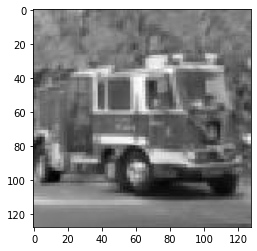

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.io import imread
from skimage.transform import resize
from tqdm import tqdm

y=[]
images=[]
X=[]


DATADIR = "/content/gdrive/MyDrive/hcaptcha_dataset/hcaptcha_dataset/train"

CATEGORIES = ["airplane","bicycle","boat","motorbus","motorcycle","seaplane","truck"]

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    break



In [3]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150))
    X.append(img_resized.flatten())
    images.append(img_resized)
    y.append(class_num)


X=np.array(X)
y=np.array(y)
images=np.array(images)



In [4]:
X[0]

array([0.16499346, 0.43950327, 0.68264052, ..., 0.31986423, 0.31986423,
       0.32770736])

In [5]:
y

array([0, 0, 0, ..., 6, 6, 6])

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=20)

In [7]:
x_train.shape

(2112, 67500)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [9]:
'''from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

    def precision(y_true, y_pred):
        """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))'''

'from keras import backend as K\n\ndef f1(y_true, y_pred):\n    def recall(y_true, y_pred):\n        """Recall metric.\n\n    Only computes a batch-wise average of recall.\n\n    Computes the recall, a metric for multi-label classification of\n    how many relevant items are selected.\n    """\n    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))\n    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))\n    recall = true_positives / (possible_positives + K.epsilon())\n    return recall\n\n    def precision(y_true, y_pred):\n        """Precision metric.\n\n    Only computes a batch-wise average of precision.\n\n    Computes the precision, a metric for multi-label classification of\n    how many selected items are relevant.\n    """\n    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))\n    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))\n    precision = true_positives / (predicted_positives + K.epsilon())\n    return precision\n\n    precisio

##A)Baseline Neural Network

In [34]:
import tensorflow as tf
model1 = keras.Sequential([

  keras.layers.Dense(512, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  
  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.BatchNormalization(),  
    
  keras.layers.Dense(64, activation='sigmoid'),
  keras.layers.BatchNormalization(),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model1.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model1.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17/17 [==============================] - 10s 493ms/step - loss: 1.1216 - accuracy: 0.6160 - val_loss: 1.9192 - val_accuracy: 0.2230
Epoch 2/20
17/17 [==============================] - 8s 476ms/step - loss: 0.8265 - accuracy: 0.7211 - val_loss: 1.9133 - val_accuracy: 0.2053
Epoch 3/20
17/17 [==============================] - 8s 472ms/step - loss: 0.8598 - accuracy: 0.6889 - val_loss: 1.9067 - val_accuracy: 0.1347
Epoch 4/20
17/17 [==============================] - 8s 475ms/step - loss: 0.9635 - accuracy: 0.6406 - val_loss: 1.8949 - val_accuracy: 0.1336
Epoch 5/20
17/17 [==============================] - 8s 472ms/step - loss: 1.0497 - accuracy: 0.6297 - val_loss: 1.8749 - val_accuracy: 0.1876
Epoch 6/20
17/17 [==============================] - 8s 474ms/step - loss: 1.0881 - accuracy: 0.6222 - val_loss: 1.8892 - val_accuracy: 0.1336
Epoch 7/20
17/17 [==============================] - 8s 474ms/step - loss: 1.1015 - accuracy: 0.5800 - val_loss: 1.9068 - val_accuracy: 0.1336
Epoch 8/20
17/17

In [35]:
model1.evaluate(x_val,y_val)

29/29 [==============================] - 2s 61ms/step - loss: 4.4468 - accuracy: 0.1766


[4.446787357330322, 0.17660044133663177]

In [36]:
acc=model1.evaluate(x_val,y_val)[1]
mod1=acc

29/29 [==============================] - 2s 61ms/step - loss: 4.4468 - accuracy: 0.1766


##B)Increasing layers and neurons

In [19]:
#Increasing layers(adding one more layer)
from tensorflow import keras
model2 = keras.Sequential([

  keras.layers.Dense(512, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  
  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.BatchNormalization(),  

  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.BatchNormalization(),  
    
  keras.layers.Dense(64, activation='sigmoid'),
  keras.layers.BatchNormalization(),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model2.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model2.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17/17 [==============================] - 10s 501ms/step - loss: 1.1206 - accuracy: 0.6255 - val_loss: 2.0000 - val_accuracy: 0.1038
Epoch 2/20
17/17 [==============================] - 8s 478ms/step - loss: 0.8970 - accuracy: 0.6823 - val_loss: 1.9762 - val_accuracy: 0.1038
Epoch 3/20
17/17 [==============================] - 8s 477ms/step - loss: 0.9756 - accuracy: 0.6572 - val_loss: 1.9426 - val_accuracy: 0.1038
Epoch 4/20
17/17 [==============================] - 8s 476ms/step - loss: 1.0166 - accuracy: 0.6454 - val_loss: 1.9195 - val_accuracy: 0.1038
Epoch 5/20
17/17 [==============================] - 8s 473ms/step - loss: 1.1020 - accuracy: 0.5895 - val_loss: 1.9251 - val_accuracy: 0.1060
Epoch 6/20
17/17 [==============================] - 8s 477ms/step - loss: 1.2327 - accuracy: 0.5346 - val_loss: 1.9249 - val_accuracy: 0.1909
Epoch 7/20
17/17 [==============================] - 8s 475ms/step - loss: 1.3093 - accuracy: 0.5099 - val_loss: 1.9332 - val_accuracy: 0.1336
Epoch 8/20
17/17

In [20]:
model2.evaluate(x_val,y_val)

29/29 [==============================] - 2s 61ms/step - loss: 2.2679 - accuracy: 0.2815


[2.267864942550659, 0.28145694732666016]

In [ ]:
acc=model2.evaluate(x_val,y_val)[1]
mod2=acc

In [25]:
#increasing number of neurons
model3 = keras.Sequential([

  keras.layers.Dense(512, activation='sigmoid', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  
  keras.layers.Dense(512, activation='sigmoid'),
  keras.layers.BatchNormalization(),  

  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.BatchNormalization(),  
    
  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.BatchNormalization(),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model3.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model3.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val))


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17/17 [==============================] - 10s 510ms/step - loss: 1.2395 - accuracy: 0.5980 - val_loss: 2.1954 - val_accuracy: 0.1336
Epoch 2/20
17/17 [==============================] - 8s 480ms/step - loss: 0.9179 - accuracy: 0.6634 - val_loss: 2.1284 - val_accuracy: 0.1336
Epoch 3/20
17/17 [==============================] - 9s 552ms/step - loss: 0.9456 - accuracy: 0.6558 - val_loss: 2.0823 - val_accuracy: 0.1336
Epoch 4/20
17/17 [==============================] - 8s 480ms/step - loss: 1.0127 - accuracy: 0.6378 - val_loss: 2.0513 - val_accuracy: 0.1336
Epoch 5/20
17/17 [==============================] - 8s 480ms/step - loss: 1.1422 - accuracy: 0.5890 - val_loss: 2.0132 - val_accuracy: 0.1336
Epoch 6/20
17/17 [==============================] - 8s 481ms/step - loss: 1.0844 - accuracy: 0.6278 - val_loss: 2.0476 - val_accuracy: 0.1336
Epoch 7/20
17/17 [==============================] - 8s 480ms/step - loss: 1.1922 - accuracy: 0.5625 - val_loss: 1.9817 - val_accuracy: 0.1336
Epoch 8/20
17/17

In [26]:
model3.evaluate(x_val,y_val)

29/29 [==============================] - 2s 63ms/step - loss: 1.5718 - accuracy: 0.3642


[1.5717597007751465, 0.3642384111881256]

In [27]:
acc=model3.evaluate(x_val,y_val)[1]
mod3=acc

##C)Experimenting with activation functions

In [10]:
#With relu activation function
import tensorflow as tf
model4 = keras.Sequential([

  keras.layers.Dense(256, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(), 

  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),  
    
  keras.layers.Dense(64, activation='relu'),
  keras.layers.BatchNormalization(),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model4.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model4.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17/17 [==============================] - 7s 283ms/step - loss: 1.0105 - accuracy: 0.6577 - val_loss: 9.5923 - val_accuracy: 0.2263
Epoch 2/20
17/17 [==============================] - 4s 260ms/step - loss: 0.5648 - accuracy: 0.8144 - val_loss: 8.1042 - val_accuracy: 0.1744
Epoch 3/20
17/17 [==============================] - 4s 256ms/step - loss: 0.4375 - accuracy: 0.8603 - val_loss: 4.2936 - val_accuracy: 0.2318
Epoch 4/20
17/17 [==============================] - 4s 258ms/step - loss: 0.3578 - accuracy: 0.8845 - val_loss: 2.4326 - val_accuracy: 0.2594
Epoch 5/20
17/17 [==============================] - 4s 257ms/step - loss: 0.3188 - accuracy: 0.9072 - val_loss: 1.5029 - val_accuracy: 0.4956
Epoch 6/20
17/17 [==============================] - 4s 257ms/step - loss: 0.2580 - accuracy: 0.9238 - val_loss: 1.0433 - val_accuracy: 0.6336
Epoch 7/20
17/17 [==============================] - 4s 259ms/step - loss: 0.2166 - accuracy: 0.9389 - val_loss: 1.0816 - val_accuracy: 0.6336
Epoch 8/20
17/17 

In [11]:
model4.evaluate(x_val,y_val)

29/29 [==============================] - 1s 32ms/step - loss: 0.5820 - accuracy: 0.8179


[0.5819680690765381, 0.8178808093070984]

In [26]:
acc=model4.evaluate(x_val,y_val)[1]
mod4=acc

29/29 [==============================] - 1s 30ms/step - loss: 0.5820 - accuracy: 0.8179


In [27]:
mod4

0.8178808093070984

In [12]:
#with leaky_relu activation function

import keras
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)

model5= keras.Sequential([

  keras.layers.Dense(256, activation=leaky_relu, input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(), 

  keras.layers.Dense(128, activation=leaky_relu),
  keras.layers.BatchNormalization(),  
    
  keras.layers.Dense(64, activation=leaky_relu),
  keras.layers.BatchNormalization(),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model5.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model5.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
17/17 [==============================] - 8s 407ms/step - loss: 1.0172 - accuracy: 0.6596 - val_loss: 10.8516 - val_accuracy: 0.4040
Epoch 2/20
17/17 [==============================] - 9s 517ms/step - loss: 0.6024 - accuracy: 0.8021 - val_loss: 6.1419 - val_accuracy: 0.4260
Epoch 3/20
17/17 [==============================] - 7s 400ms/step - loss: 0.4918 - accuracy: 0.8414 - val_loss: 4.1760 - val_accuracy: 0.3797
Epoch 4/20
17/17 [==============================] - 4s 252ms/step - loss: 0.4102 - accuracy: 0.8755 - val_loss: 3.0329 - val_accuracy: 0.4581
Epoch 5/20
17/17 [==============================] - 4s 253ms/step - loss: 0.3652 - accuracy: 0.8830 - val_loss: 1.4815 - val_accuracy: 0.5265
Epoch 6/20
17/17 [==============================] - 4s 253ms/step - loss: 0.2939 - accuracy: 0.9115 - val_loss: 1.0053 - val_accuracy: 0.6700
Epoch 7/20
17/17 [==============================] - 4s 255ms/step - loss: 0.2430 - accuracy: 0.9257 - val_loss: 0.9415 - val_accuracy: 0.6711
Epoch

In [13]:
model5.evaluate(x_val,y_val)

29/29 [==============================] - 1s 31ms/step - loss: 0.8810 - accuracy: 0.7561


[0.8809712529182434, 0.756070613861084]

In [28]:
acc=model5.evaluate(x_val,y_val)[1]
mod5=acc

29/29 [==============================] - 1s 31ms/step - loss: 0.8810 - accuracy: 0.7561


##D)Regurlization techniques:Early stopping and dropout,L1 for sparse model

In [14]:
#early stoping
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [15]:
model6 = keras.Sequential([

  keras.layers.Dense(256, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(), 

  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  
  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),  
    
  keras.layers.Dense(64, activation='relu'),
  keras.layers.BatchNormalization(),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model6.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model6.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val),callbacks=callback)

Epoch 1/20
17/17 [==============================] - 6s 274ms/step - loss: 1.2546 - accuracy: 0.5829 - val_loss: 11.4848 - val_accuracy: 0.1744
Epoch 2/20
17/17 [==============================] - 4s 257ms/step - loss: 0.7105 - accuracy: 0.7595 - val_loss: 7.7225 - val_accuracy: 0.1623
Epoch 3/20
17/17 [==============================] - 8s 513ms/step - loss: 0.5477 - accuracy: 0.8191 - val_loss: 5.9432 - val_accuracy: 0.1611
Epoch 4/20
17/17 [==============================] - 6s 330ms/step - loss: 0.4395 - accuracy: 0.8646 - val_loss: 3.9410 - val_accuracy: 0.1865
Epoch 5/20
17/17 [==============================] - 4s 260ms/step - loss: 0.3707 - accuracy: 0.8845 - val_loss: 2.3392 - val_accuracy: 0.3124
Epoch 6/20
17/17 [==============================] - 4s 260ms/step - loss: 0.3136 - accuracy: 0.9058 - val_loss: 1.7040 - val_accuracy: 0.4371
Epoch 7/20
17/17 [==============================] - 4s 265ms/step - loss: 0.2538 - accuracy: 0.9214 - val_loss: 1.3502 - val_accuracy: 0.5574
Epoch

In [16]:
model6.evaluate(x_val,y_val)

29/29 [==============================] - 1s 32ms/step - loss: 0.6259 - accuracy: 0.8212


[0.6259158253669739, 0.8211920261383057]

In [30]:
acc=model6.evaluate(x_val,y_val)[1]
mod6=acc

29/29 [==============================] - 1s 33ms/step - loss: 0.6259 - accuracy: 0.8212


In [17]:
#dropouts for reguralization
from tensorflow.keras.layers import Dropout

model7 = keras.Sequential([

  keras.layers.Dense(256, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  Dropout(0.3), 

  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  Dropout(0.3),
  
  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(), 
  Dropout(0.3), 
    
  keras.layers.Dense(64, activation='relu'),
  keras.layers.BatchNormalization(),
  Dropout(0.3),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model7.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model7.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val),callbacks=callback)

Epoch 1/20
17/17 [==============================] - 8s 367ms/step - loss: 1.9870 - accuracy: 0.3144 - val_loss: 10.6945 - val_accuracy: 0.1457
Epoch 2/20
17/17 [==============================] - 4s 260ms/step - loss: 1.3864 - accuracy: 0.5170 - val_loss: 7.1052 - val_accuracy: 0.1898
Epoch 3/20
17/17 [==============================] - 4s 264ms/step - loss: 1.1670 - accuracy: 0.5914 - val_loss: 5.8414 - val_accuracy: 0.2439
Epoch 4/20
17/17 [==============================] - 4s 259ms/step - loss: 1.0380 - accuracy: 0.6335 - val_loss: 3.4310 - val_accuracy: 0.3841
Epoch 5/20
17/17 [==============================] - 4s 259ms/step - loss: 0.9527 - accuracy: 0.6605 - val_loss: 2.4530 - val_accuracy: 0.4680
Epoch 6/20
17/17 [==============================] - 4s 261ms/step - loss: 0.8943 - accuracy: 0.6771 - val_loss: 1.9027 - val_accuracy: 0.4525
Epoch 7/20
17/17 [==============================] - 4s 258ms/step - loss: 0.8209 - accuracy: 0.7050 - val_loss: 1.2497 - val_accuracy: 0.6159
Epoch

In [18]:
model7.evaluate(x_val,y_val)

29/29 [==============================] - 1s 32ms/step - loss: 0.5896 - accuracy: 0.7958


[0.5895634889602661, 0.7958057522773743]

In [29]:
acc=model7.evaluate(x_val,y_val)[1]
mod7=acc

29/29 [==============================] - 1s 31ms/step - loss: 0.5896 - accuracy: 0.7958


In [19]:
#L1 for sparse model
from tensorflow.keras import regularizers
modell8 = keras.Sequential([

  keras.layers.Dense(1024, activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  
  keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  keras.layers.BatchNormalization(),  
    
  keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  keras.layers.BatchNormalization(),
    


  keras.layers.Dense(7, activation='softmax',kernel_regularizer='l1'),
  
    

 
])

modell8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer='adam', metrics=['accuracy'])
history=modell8.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val),callbacks=callback)

Epoch 1/20
17/17 [==============================] - 17s 937ms/step - loss: 2.3044 - accuracy: 0.6742 - val_loss: 38.4527 - val_accuracy: 0.3278
Epoch 2/20
17/17 [==============================] - 15s 918ms/step - loss: 1.8103 - accuracy: 0.7945 - val_loss: 28.6725 - val_accuracy: 0.2031
Epoch 3/20
17/17 [==============================] - 15s 915ms/step - loss: 1.6075 - accuracy: 0.8305 - val_loss: 13.2208 - val_accuracy: 0.2704
Epoch 4/20
17/17 [==============================] - 15s 914ms/step - loss: 1.4345 - accuracy: 0.8703 - val_loss: 6.8883 - val_accuracy: 0.3929
Epoch 5/20
17/17 [==============================] - 15s 916ms/step - loss: 1.2901 - accuracy: 0.8826 - val_loss: 3.7117 - val_accuracy: 0.4967
Epoch 6/20
17/17 [==============================] - 15s 915ms/step - loss: 1.1580 - accuracy: 0.8892 - val_loss: 2.6652 - val_accuracy: 0.5651
Epoch 7/20
17/17 [==============================] - 17s 1s/step - loss: 1.0537 - accuracy: 0.9001 - val_loss: 2.4040 - val_accuracy: 0.5629

In [20]:
modell8.evaluate(x_val,y_val)

29/29 [==============================] - 3s 117ms/step - loss: 0.9416 - accuracy: 0.7892


[0.9416460990905762, 0.7891831994056702]

In [31]:
acc=modell8.evaluate(x_val,y_val)[1]
modd8=acc

29/29 [==============================] - 3s 114ms/step - loss: 0.9416 - accuracy: 0.7892


##E)Using 2 other optimizers

In [22]:
#rmsprop optimizer
model8 = keras.Sequential([

  keras.layers.Dense(256, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  Dropout(0.3), 

  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  Dropout(0.3),
  
  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(), 
  Dropout(0.3), 
    
  keras.layers.Dense(64, activation='relu'),
  keras.layers.BatchNormalization(),
  Dropout(0.3),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model8.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model8.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val),callbacks=callback)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17/17 [==============================] - 8s 341ms/step - loss: 1.5102 - accuracy: 0.4697 - val_loss: 96.7194 - val_accuracy: 0.1038
Epoch 2/20
17/17 [==============================] - 5s 314ms/step - loss: 1.0367 - accuracy: 0.6264 - val_loss: 73.7261 - val_accuracy: 0.1049
Epoch 3/20
17/17 [==============================] - 5s 311ms/step - loss: 0.9085 - accuracy: 0.6652 - val_loss: 19.3629 - val_accuracy: 0.3046
Epoch 4/20
17/17 [==============================] - 5s 309ms/step - loss: 0.8612 - accuracy: 0.6899 - val_loss: 9.6706 - val_accuracy: 0.2792
Epoch 5/20
17/17 [==============================] - 7s 409ms/step - loss: 0.7930 - accuracy: 0.7121 - val_loss: 11.4043 - val_accuracy: 0.3664
Epoch 6/20
17/17 [==============================] - 5s 317ms/step - loss: 0.7719 - accuracy: 0.7273 - val_loss: 6.3718 - val_accuracy: 0.3631
Epoch 7/20
17/17 [==============================] - 5s 314ms/step - loss: 0.7461 - accuracy: 0.7424 - val_loss: 3.2310 - val_accuracy: 0.4216
Epoch 8/20
17

In [23]:
model8.evaluate(x_val,y_val)

29/29 [==============================] - 4s 123ms/step - loss: 5.5781 - accuracy: 0.3510


[5.578050136566162, 0.3509933650493622]

In [32]:
acc=model8.evaluate(x_val,y_val)[1]
mod8=acc

29/29 [==============================] - 1s 31ms/step - loss: 5.5781 - accuracy: 0.3510


In [24]:
#sgd optimizer

model9 = keras.Sequential([

  keras.layers.Dense(256, activation='relu', input_dim=x_train.shape[1]),
  keras.layers.BatchNormalization(),
  Dropout(0.3), 

  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  Dropout(0.3),
  
  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(), 
  Dropout(0.3), 
    
  keras.layers.Dense(64, activation='relu'),
  keras.layers.BatchNormalization(),
  Dropout(0.3),  



  keras.layers.Dense(7, activation='softmax'),
  
    

 
])

model9.compile(optimizer="sgd",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model9.fit(x_train, y_train, verbose=1,batch_size=128, epochs=20,validation_data=(x_val,y_val),callbacks=callback)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


17/17 [==============================] - 5s 238ms/step - loss: 2.0500 - accuracy: 0.3087 - val_loss: 2.9171 - val_accuracy: 0.2506
Epoch 2/20
17/17 [==============================] - 4s 219ms/step - loss: 1.5581 - accuracy: 0.4309 - val_loss: 3.0165 - val_accuracy: 0.2075
Epoch 3/20
17/17 [==============================] - 6s 386ms/step - loss: 1.3270 - accuracy: 0.5327 - val_loss: 1.7864 - val_accuracy: 0.4481
Epoch 4/20
17/17 [==============================] - 4s 218ms/step - loss: 1.2198 - accuracy: 0.5753 - val_loss: 1.5708 - val_accuracy: 0.4525
Epoch 5/20
17/17 [==============================] - 4s 218ms/step - loss: 1.0794 - accuracy: 0.6297 - val_loss: 2.4346 - val_accuracy: 0.3731
Epoch 6/20
17/17 [==============================] - 4s 219ms/step - loss: 1.0273 - accuracy: 0.6591 - val_loss: 1.5767 - val_accuracy: 0.4702
Epoch 7/20
17/17 [==============================] - 4s 218ms/step - loss: 0.9315 - accuracy: 0.6804 - val_loss: 0.9723 - val_accuracy: 0.6733
Epoch 8/20
17/17 

In [25]:
model9.evaluate(x_val,y_val)

29/29 [==============================] - 1s 30ms/step - loss: 1.3032 - accuracy: 0.5740


[1.3031967878341675, 0.5739514231681824]

In [33]:
acc=model9.evaluate(x_val,y_val)[1]
mod9=acc

29/29 [==============================] - 1s 32ms/step - loss: 1.3032 - accuracy: 0.5740


##Tabulating confidence intervals(95% samples lie between these metrics(error/accuracy)

In [38]:
import pandas as pd
table=pd.DataFrame({"BaseLine NN":mod1,"relu activaton":mod4,"LeakyRelu":mod5,"Early Stopping":mod6,"Dropout":mod7,"L1-sparse":modd8,"RmsProp optimizer":mod8,"sgd":mod9},index=["Accuarcy",'micro-f1','macro-f1'])

In [39]:
table

,BaseLine NN,relu activaton,LeakyRelu,Early Stopping,Dropout,L1-sparse,RmsProp optimizer,sgd
Accuarcy,0.1766,0.817881,0.756071,0.821192,0.795806,0.789183,0.350993,0.573951
micro-f1,0.1766,0.817881,0.756071,0.821192,0.795806,0.789183,0.350993,0.573951
macro-f1,0.1766,0.817881,0.756071,0.821192,0.795806,0.789183,0.350993,0.573951


In [40]:
#model 6 has better performance than others